# Atelier sur la Régression Linéaire avec Python


## Exercice 1 : Calculer la ligne de régression à partir de zéro

1. Formula for `m`:
m = Cov(X, Y) / Var(X)

where:
- `Cov(X, Y)` is the covariance between `X` and `Y`,
- `Var(X)` is the variance of `X`.


2. Formula for `b`:
b = Ȳ - m * X̄

where:
- `Ȳ` is the mean of `Y`,
- `X̄` is the mean of `X`,
- `m` is the slope (calculated using the first formula).


In [2]:
import numpy as np 

# Données
x = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

# Calcule des moyennes
x_mean = np.mean(x)
y_mean = np.mean(Y)

# Calcul de la pente m = covariance(x, Y) / variance(x)
m = np.sum((x - x_mean) * (Y - y_mean)) / np.sum((x - x_mean) ** 2)

# Calcul de l'ordonnée à l'origine b = y_mean - m * x_mean
b = y_mean - m * x_mean

print(f"La ligne de régression est y = {m:.2f}x + {b:.2f}")



La ligne de régression est y = 0.60x + 2.20


## Exercice 2 : Visualiser la ligne de régression


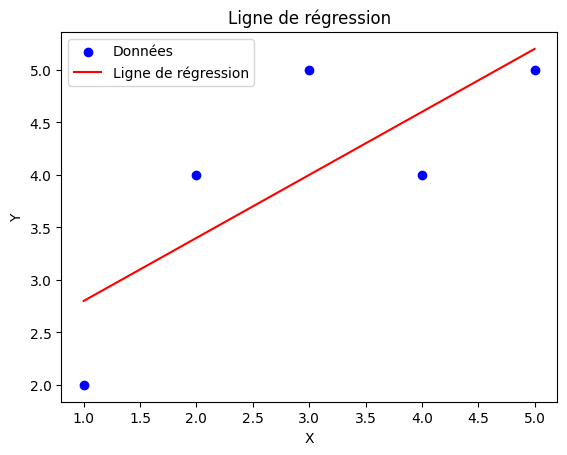

In [3]:
import matplotlib.pyplot as plt

# Calculer les valeurs prédites
Y_pred = m * x + b

# Visualiser les données et la ligne de régression
plt.scatter(x, Y, color='blue', label='Données')
plt.plot(x, Y_pred, color='red', label='Ligne de régression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ligne de régression')
plt.legend()
plt.show()


## Exercice 3 : Prédire de nouvelles valeurs


Les prédictions pour x = [6 7 8] sont y = [5.8 6.4 7. ]


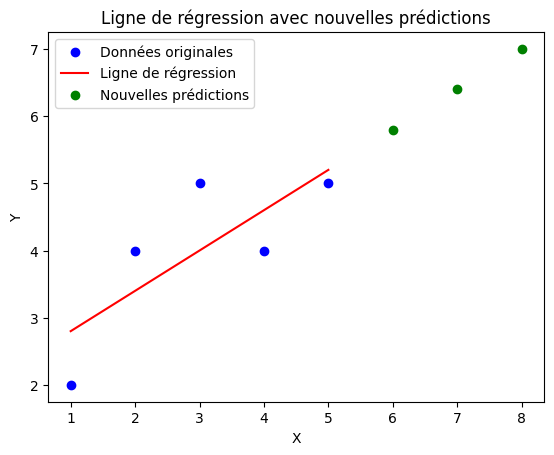

In [8]:
def fonction_prediction(x, m, b):
    return m * x + b

# Prédire la valeur pour x = [6,7,8]
x_new = np.array([6, 7, 8])
y_new = fonction_prediction(x_new, m, b)

print(f"Les prédictions pour x = {x_new} sont y = {y_new}")

# Visualiser les nouvelles valeurs prédites
plt.scatter(x, Y, color='blue', label='Données originales')
plt.plot(x, Y_pred, color='red', label='Ligne de régression')
plt.scatter(x_new, y_new, color='green', label='Nouvelles prédictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ligne de régression avec nouvelles prédictions')
plt.legend()
plt.show()



## Exercice 4 : Utiliser scikit-learn pour simplifier la régression


In [9]:
from sklearn.linear_model import LinearRegression

# Mise en forme des données
x_reshaped = x.reshape(-1, 1)

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(x_reshaped, Y)

# Extraire les coefficients
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Coefficient de la pente (m) : {m_sklearn:.2f}")
print(f"Ordonnée à l'origine (b) : {b_sklearn:.2f}")



Coefficient de la pente (m) : 0.60
Ordonnée à l'origine (b) : 2.20


## Exercice 5 : Tester le modèle avec des données réelles


Coefficient de la pente (m) : -0.08
Ordonnée à l'origine (b) : 4.84


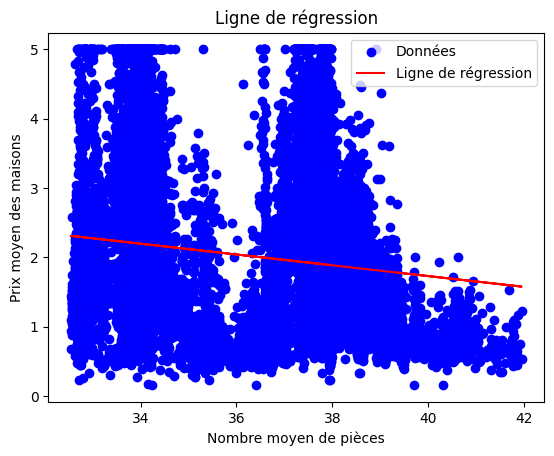

In [18]:
from sklearn.datasets import fetch_california_housing

# Charger les données
data = fetch_california_housing()

# afficher les données
# print(data.DESCR)

# Selection d'une relation simple - utilisant le nombre moyen de pièces
x = data.data[:, 6]  # L'index 6 correspond au nombre moyen de pièces
y = data.target 

# Mise en forme des données
x_reshaped = x.reshape(-1, 1)

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(x_reshaped, y)

# Extraire les coefficients
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Coefficient de la pente (m) : {m_sklearn:.2f}")
print(f"Ordonnée à l'origine (b) : {b_sklearn:.2f}")

# Afficher les données et la ligne de régression
plt.scatter(x, y, color='blue', label='Données')
plt.plot(x, model.predict(x_reshaped), color='red', label='Ligne de régression')
plt.xlabel('Nombre moyen de pièces')
plt.ylabel('Prix moyen des maisons')
plt.title('Ligne de régression')
plt.legend()
plt.show()
